In [1]:
import cv2
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras 
import pandas as pd

In [2]:
def read_directory(directory_name):
    X,Y= [],[]
    for filename in os.listdir(directory_name):
        image = cv2.imread(directory_name+"/"+filename,cv2.IMREAD_GRAYSCALE)#直接读灰度图降维
        X.append(image)
        Y.append(int(filename[0]))
    X = np.array(X).astype(np.float64)/255
    Y = np.array(Y)
    return X,Y

In [3]:
X,Y = read_directory("data_set/mnist")
X,X_test,Y,Y_test = X[::2],X[1::2],Y[::2],Y[1::2]
epochs = 100

In [9]:
model = keras.Sequential(
    [
        keras.layers.Flatten(name = 'IN_PUT',input_shape=(28,28,)),
        keras.layers.Dense(units=128,activation='relu',name = 'DENSE_1'),
        keras.layers.Dense(units=10,activation='relu',name = 'DENSE_2'),
        tf.keras.layers.Softmax(name = 'OUT_PUT')
     
    ]
)
model.compile(
            optimizer='adam',
            loss= keras.losses.SparseCategoricalCrossentropy(),
            metrics=['accuracy']
            )
train_history = model.fit(X,Y,epochs=epochs) 
model.summary() 
#model.save('my_model/09999_accuracy_nmist')

Epoch 1/100
657/657 [==============================] - 1s 1ms/step - loss: 0.6086 - accuracy: 0.8111
Epoch 2/100
657/657 [==============================] - 1s 1ms/step - loss: 0.4001 - accuracy: 0.8602
Epoch 3/100
657/657 [==============================] - 1s 1ms/step - loss: 0.3268 - accuracy: 0.8828
Epoch 4/100
657/657 [==============================] - 1s 1ms/step - loss: 0.1063 - accuracy: 0.9699
Epoch 5/100
657/657 [==============================] - 1s 1ms/step - loss: 0.0781 - accuracy: 0.9780
Epoch 6/100
657/657 [==============================] - 1s 1ms/step - loss: 0.0578 - accuracy: 0.9836
Epoch 7/100
657/657 [==============================] - 1s 1ms/step - loss: 0.0457 - accuracy: 0.9879
Epoch 8/100
657/657 [==============================] - 1s 1ms/step - loss: 0.0346 - accuracy: 0.9909
Epoch 9/100
657/657 [==============================] - 1s 1ms/step - loss: 0.0273 - accuracy: 0.9931
Epoch 10/100
657/657 [==============================] - 1s 1ms/step - loss: 0.0194 - accura

In [5]:
cap  = cv2.VideoCapture(0)
if not cap.isOpened():
     print("无法检测到摄像头")
     exit()
else:
     for i in range(0, 19):
          print(cap.get(i))
     while(1):
          ret, frame = cap.read() #ret为布尔值是否读取到图片 fram为读取的图像
          cv2.imshow(u"frame", frame)
          target_image = frame[0:480,80:560,:]
          cv2.imshow(u"target_image", target_image)
          resize_image = cv2.bitwise_not(cv2.resize(target_image,(28,28))) #黑白反转
          nbcs,resize_image = cv2.threshold(resize_image,175,255,cv2.THRESH_BINARY)
          cv2.imshow(u"resize_image", resize_image)
          key = cv2.waitKey(1)
          if key & 0xff == ord('q') :
               print("结束")
               break
          if key & 0xff == ord('p') :
                test_list = []
                test_jpg = cv2.cvtColor(resize_image,cv2.COLOR_BGR2GRAY)
                test_list.append(test_jpg)
                test_list = np.array(test_list).astype(np.float64)/255
                predictions = model.predict(test_list)
                print(predictions)
                print(np.argmax(predictions[0]))
     cap.release()
     cv2.destroyAllWindows()

0.0
0.0
-1.0
640.0
480.0
30.0
22.0
-1.0
-1.0
1.0
128.0
32.0
64.0
0.0
-1.0
-6.0
1.0
1.0
1.0
1/1 [==============================] - 0s 62ms/step
[[5.3639894e-32 5.3639894e-32 5.3639894e-32 5.3639894e-32 5.3639894e-32
  5.3639894e-32 5.3639894e-32 9.9521881e-01 5.3639894e-32 4.7811223e-03]]
7
1/1 [==============================] - 0s 14ms/step
[[2.3067574e-23 2.3067574e-23 2.3067574e-23 2.3067574e-23 2.3067574e-23
  2.3067574e-23 2.3067574e-23 1.1890750e-02 2.3067574e-23 9.8810929e-01]]
9
1/1 [==============================] - 0s 14ms/step
[[3.3151409e-10 3.3151409e-10 3.3151409e-10 3.3151409e-10 9.9835700e-01
  3.3151409e-10 1.1081909e-09 3.3151409e-10 1.6429768e-03 3.3151409e-10]]
4
1/1 [==============================] - 0s 14ms/step
[[7.7724890e-06 7.7724890e-06 7.7724890e-06 7.7724890e-06 5.4279686e-04
  7.7724890e-06 7.7724890e-06 9.7418743e-01 7.7724881e-06 2.5215346e-02]]
7
1/1 [==============================] - 0s 15ms/step
[[7.1557041e-04 7.1557041e-04 7.1557041e-04 7.1557041e-04

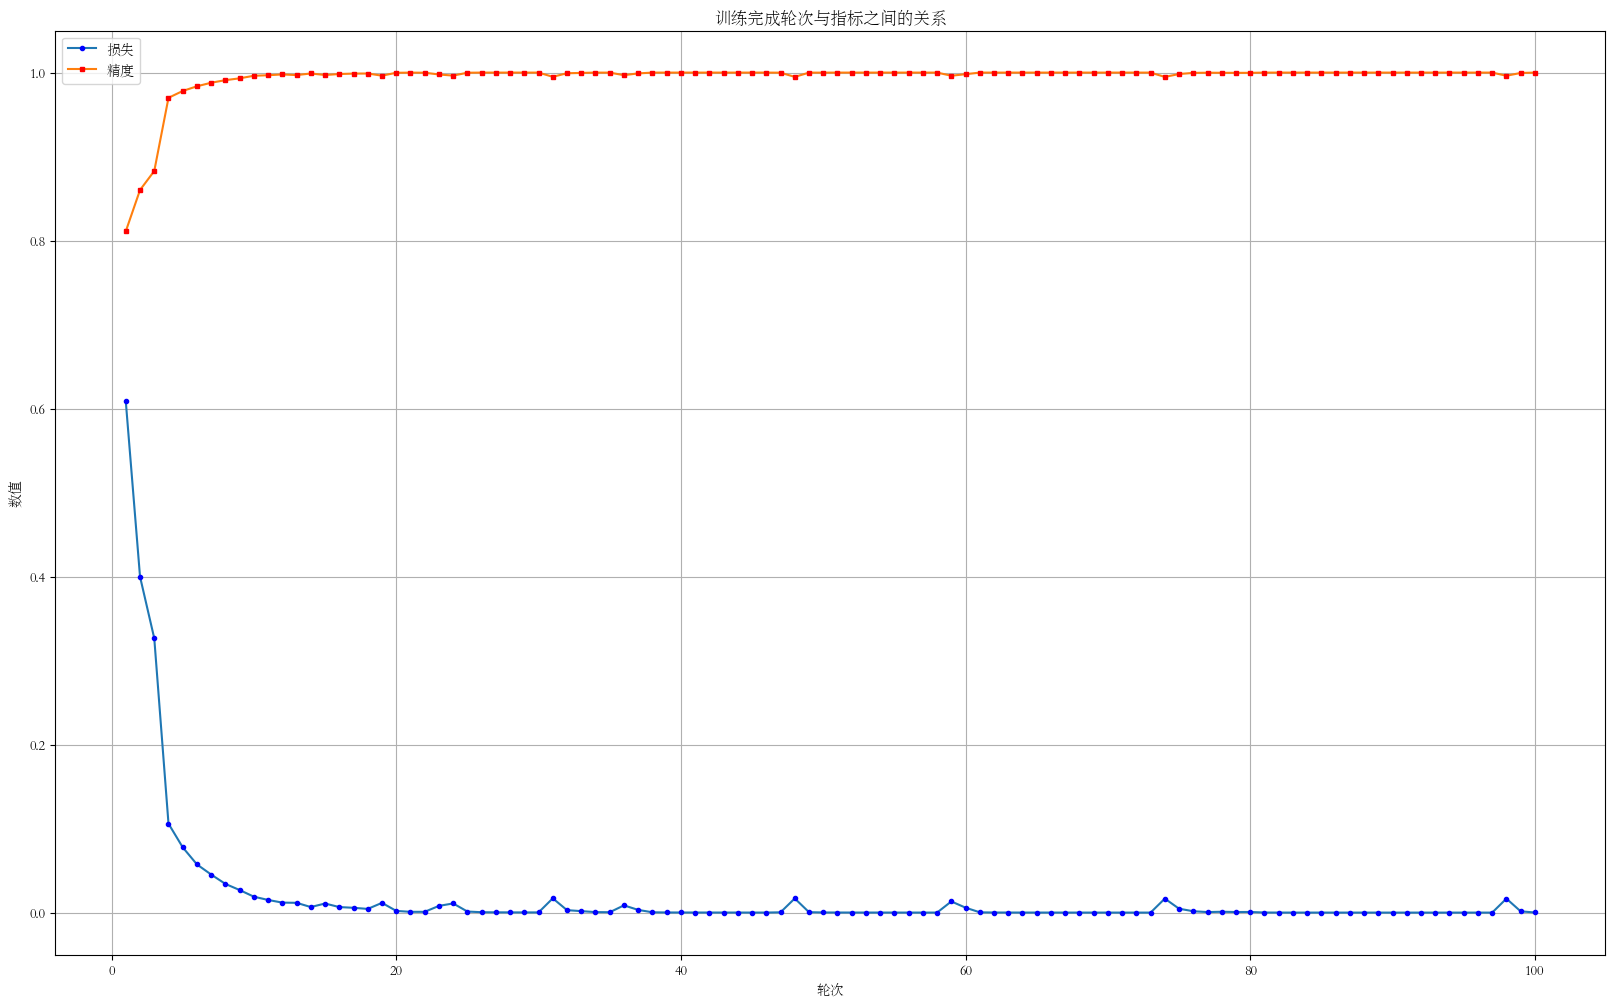

In [ ]:
train_history = model.history
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'STSong'
train_time_list = range(1,epochs+1)
plt.figure(figsize=(20, 12))
plt.plot(train_time_list,train_history.history["loss"],'o-',markersize=3, markerfacecolor='blue', markeredgecolor='blue', label='损失')
plt.plot(train_time_list,train_history.history["accuracy"],'s-',markersize=3, markerfacecolor='red', markeredgecolor='red',label='精度')
plt.title('训练完成轮次与指标之间的关系')
plt.xlabel('轮次')
plt.ylabel('数值')
plt.legend()#曲线标识
plt.grid(True)#方格
plt.show()